# Modelos Diego F. Osorio
RandomForestClassifiers - RandomForestRegressors
Modelos de Clasificación y Regresión:
Boosting

In [67]:
# # import libraries
%matplotlib notebook
%matplotlib widget

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier



#import graphviz 
#import shap


import warnings

warnings.filterwarnings('ignore')

In [13]:
import multiprocessing

multiprocessing.cpu_count()

8

In [2]:
# cargar la base dummyficada
df_dummy = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/dfdummy.csv')

# cargar train-set con variables continuas escaladas
train_s = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/train_s.csv')
# cargar test-set con variables continuas escaladas
test_s = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/tets_s.csv')

# cargar train-set con tecnica de imbalance: undersampling de la clase mayoritaria (NO POBRE)
train_s_under = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/train_s_under.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/dfdummy.csv'

In [5]:
df_dummy = pd.read_csv('C:/Users/df.osorio11/Documents/aux_docs/bd_econ/PS2/df_dummy.csv')
train_s = pd.read_csv('C:/Users/df.osorio11/Documents/aux_docs/bd_econ/PS2/train_s.csv')
test_s = pd.read_csv('C:/Users/df.osorio11/Documents/aux_docs/bd_econ/PS2/test_s.csv')
train_s_under = pd.read_csv('C:/Users/df.osorio11/Documents/aux_docs/bd_econ/PS2/train_s_under.csv')

train_s_under

,Unnamed: 0,Clase1,Clase2,P5000,P5010,P50902,P50903,P50904,P50905,P50906,...,recibe_arriendos1,prop_cotiza,ppc,Valor_Arriendo,age2,años_educ_promedio,ninis,prop_ninis,log_ingtot,Pobre1
0,1,1,0,-0.331590,0.008056,0,0,0,0,0,...,1,-0.836094,-0.281325,0.008593,2.520137,1.185309,1.701809,1.387039,14.457365,0
1,2,1,0,-0.331590,1.121116,0,1,0,0,0,...,0,0.622986,0.319365,-0.067392,-0.193994,0.104126,0.446165,0.028904,14.611894,0
2,3,1,0,-1.153076,-1.105003,0,0,0,0,0,...,0,-0.836094,-0.882015,-0.038898,1.102142,-1.143394,-0.809478,-0.785978,13.527830,0
3,4,1,0,-1.974562,-1.105003,0,1,0,0,0,...,0,2.082066,-0.882015,-0.076891,0.575642,-1.143394,-0.809478,-0.785978,13.458837,0
4,5,0,1,1.311382,1.121116,0,0,1,0,0,...,0,0.622986,-0.481555,-0.069767,-0.465115,-0.145378,-0.809478,-0.785978,14.642747,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63797,63798,1,0,0.489896,0.008056,0,1,0,0,0,...,0,-0.836094,-0.281325,-0.050771,-0.017327,-0.228545,0.446165,0.300531,13.081540,1
63798,63799,1,0,-0.331590,-1.105003,0,1,0,0,0,...,0,-0.836094,1.520745,-0.050771,-0.996863,1.601150,0.446165,0.843785,0.000000,1
63799,63800,0,1,-0.331590,0.008056,0,0,0,0,0,...,0,-0.836094,0.319365,-0.086389,0.505092,-1.476066,-0.809478,-0.785978,13.358750,1
63800,63801,1,0,-0.331590,0.008056,0,1,0,0,0,...,0,-0.836094,0.319365,-0.024650,-1.103562,0.270463,0.446165,0.843785,13.487010,1


In [ ]:
# cargar la base dummyficada
df_dummy = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/dfdummy.csv')

# cargar train-set con variables continuas escaladas
train_s = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/train_s.csv')
# cargar test-set con variables continuas escaladas
test_s = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/tets_s.csv')

# cargar train-set con tecnica de imbalance: undersampling de la clase mayoritaria (NO POBRE)
train_s_under = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/train_s_under.csv')


In [10]:
train_s_under.head()

# calcular max_features sugerido
max_features_class = np.sqrt(train_s.shape[1])
max_features_reg1 = np.log2(train_s.shape[1])
max_features_reg_max = 0.4*train_s.shape[1]

max_features_reg_max

46.0

In [40]:
# Bases para clasificación
# y_train yi obs/target es discreta. variable Pobre1[0,1]
# x_train es todas las variables en x_test - y_target(pobre1)- log_ingtot -Ingtotugarr- Clase1- Lp  variables con multi colinealidad

y_train = train_s_under['Pobre1']
x_train = train_s_under.drop(['Unnamed: 0','Pobre1','log_ingtot','Ingtotugarr','Clase1','Lp'], axis=1) 
vars1 = ["prop_cotiza","Valor_Arriendo", "ppc", "años_educ_promedio", "Npersug", "prop_ocupados_pet", "age2", "recibe_arriendos1"]

x_train = x_train[["prop_cotiza","Valor_Arriendo", "ppc", "años_educ_promedio", "Npersug", "prop_ocupados_pet", "age2", "recibe_arriendos1"]]



y_test = test_s['Pobre1']
x_test = test_s.drop(['Unnamed: 0','Pobre1','log_ingtot','Ingtotugarr','Clase1','Lp'], axis=1) 
x_test = x_test[["prop_cotiza","Valor_Arriendo", "ppc", "años_educ_promedio", "Npersug", "prop_ocupados_pet", "age2", "recibe_arriendos1"]]

x_train

,prop_cotiza,Valor_Arriendo,ppc,años_educ_promedio,Npersug,prop_ocupados_pet,age2,recibe_arriendos1
0,-0.836094,0.008593,-0.281325,1.185309,3,-0.731050,2.520137,1
1,0.622986,-0.067392,0.319365,0.104126,6,0.500951,-0.193994,0
2,-0.836094,-0.038898,-0.882015,-1.143394,1,1.240152,1.102142,0
3,2.082066,-0.076891,-0.882015,-1.143394,1,1.240152,0.575642,0
4,0.622986,-0.069767,-0.481555,-0.145378,4,0.500951,-0.465115,0
...,...,...,...,...,...,...,...,...
63797,-0.836094,-0.050771,-0.281325,-0.228545,3,-0.731050,-0.017327,0
63798,-0.836094,-0.050771,1.520745,1.601150,3,-1.716651,-0.996863,0
63799,-0.836094,-0.086389,0.319365,-1.476066,4,-0.238249,0.505092,0
63800,-0.836094,-0.024650,0.319365,0.270463,4,-0.238249,-1.103562,0


In [98]:
# Bases para regresión
# y_train yi obs/target es discreta. variable Pobre1[0,1]
# x_train es todas las variables en x_test - y_target(pobre1)- log_ingtot -Ingtotugarr- Clase1- Lp  variables con multi colinealidad

y_train = train_s_under['log_ingtot']
x_train_lp = train_s_under['Lp']
y_train_p = train_s_under['Pobre1']
x_train = train_s_under.drop(['Unnamed: 0','Pobre1','log_ingtot','Ingtotugarr','Clase1','Lp'], axis=1) 


x_train = x_train[["prop_cotiza","Valor_Arriendo", "ppc", "años_educ_promedio", "Npersug", "prop_ocupados_pet", "age2", "recibe_arriendos1"]]


y_test = test_s['log_ingtot']
y_test_p = test_s['Pobre1']
x_test_lp = test_s['Lp']
x_test = test_s.drop(['Unnamed: 0','Pobre1','log_ingtot','Ingtotugarr','Clase1','Lp'], axis=1) 
x_test = x_test[["prop_cotiza","Valor_Arriendo", "ppc", "años_educ_promedio", "Npersug", "prop_ocupados_pet", "age2", "recibe_arriendos1"]]


y_train

0        14.457365
1        14.611894
2        13.527830
3        13.458837
4        14.642747
           ...    
63797    13.081540
63798     0.000000
63799    13.358750
63800    13.487010
63801    13.527830
Name: log_ingtot, Length: 63802, dtype: float64

In [44]:
# crear RandomForestClassifier
class_rfc = RandomForestClassifier(random_state=0)
# ajustar modelo
class_rfc.fit(x_train,y_train)

# existen 3 tipos de hiper parametros:
# parametros de boosting: afectan el efecto de boosting en el modelo
# parametros de arbol: afectan cada arbol individual
# parametros miscelaneos: otros parametros overall


# crear grid de valores para hacer GridSerachCV de parametros optimos mediante validacion cruzada
grid_values_tunn = {'n_estimators': [50,100,300], 'max_features':[5,8], 'max_depth':[8,10,12] ,'min_samples_split':[500,600,800],  'criterion': ['gini'], 'n_jobs' :[-1] }


# crear GridSearchCV 
grid_rfc_recall = GridSearchCV(class_rfc, param_grid= grid_values_tunn, scoring='recall')
grid_rfc_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_rfc_recall.best_params_)
print('Grid best score (recall): ' , grid_rfc_recall.best_score_)

grid_rfc_recall

Grid best parameter(max. recall):  {'criterion': 'gini', 'max_depth': 8, 'max_features': 8, 'min_samples_split': 500, 'n_estimators': 300, 'n_jobs': -1}
Grid best score (recall):  0.801574974132558


GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini'], 'max_depth': [8, 10, 12],
                         'max_features': [5, 8],
                         'min_samples_split': [500, 600, 800],
                         'n_estimators': [50, 100, 300], 'n_jobs': [-1]},
             scoring='recall')

In [49]:
# ajustar modelo optimo con train-set
grid_rfc_recall.fit(x_train,y_train)

# crear vectores de prediccion y_hat  en trian-set y test-set
y_hat_train =grid_rfc_recall.predict(x_train)
y_hat_test = grid_rfc_recall.predict(x_test)

# matriz de confusion
confusion_train = confusion_matrix(y_train, y_hat_train)
confusion_test = confusion_matrix(y_test, y_hat_test)

# metricas de evaluacion

train_acc = accuracy_score(y_train, y_hat_train )
test_acc = accuracy_score(y_test, y_hat_test )

train_prec =precision_score(y_train, y_hat_train)
test_prec =precision_score(y_test, y_hat_test )

train_recall = recall_score(y_train, y_hat_train )
test_recall = recall_score(y_test, y_hat_test )

train_f1 = f1_score(y_train, y_hat_train )
test_f1 = f1_score(y_test, y_hat_test )



tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train ).ravel()
spec_train = tn / (tn+fp)

tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test ).ravel()
spec_test = tn / (tn+fp)


avg_train = 0.75*train_recall+0.25*spec_train
avg_test = 0.75*test_recall+0.25*spec_test


#print(classification_report)
print(avg, train_acc, test_acc, train_prec, test_prec, train_recall, test_recall, train_f1, test_f1)


# Resultados

data = [{'avg':avg_train, 'accuracy':train_acc, 'precision':train_prec, 'recall':train_recall, 'specificity': spec_train, 'F1':train_f1},
       {'avg':avg_test, 'accuracy':test_acc, 'precision':test_prec, 'recall':test_recall,'specificity': spec_test, 'F1':test_f1}]

res = pd.DataFrame(data, index=['train-set', 'test-set'])
res


0.7005018506192796 0.8211811541957932 0.8204928916091843 0.7621099554234769 0.552934472934473 0.803886995023706 0.7496909765142151 0.7824412196563757 0.6364530727356202


,avg,accuracy,precision,recall,specificity,F1
train-set,0.811093,0.821181,0.762110,0.803887,0.832711,0.782441
test-set,0.772085,0.820493,0.552934,0.749691,0.839267,0.636453


In [99]:
# crear RandomForestRegressor
rfr= RandomForestRegressor(random_state=0, n_jobs=-1)
# ajustar el modelo
rfr.fit(x_train,y_train)


# existen 3 tipos de hiper parametros:
# parametros de boosting: afectan el efecto de boosting en el modelo
# parametros de arbol: afectan cada arbol individual
# parametros miscelaneos: otros parametros overall

# crear grid de valores para hacer GridSerachCV de parametros optimos mediante validacion cruzada
grid_values_tunn_rfr = {'n_estimators': [100,300,500], 'max_features':[5,6,8], 'max_depth':[6,8,10] ,'min_samples_split':[400,500,600],  'criterion': ['mse'] }



# crear GridSearchCV 
grid_rfr_recall = GridSearchCV(rfr, param_grid= grid_values_tunn_rfr, scoring='recall')
grid_rfr_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_rfr_recall.best_params_)
print('Grid best score (recall): ' , grid_rfr_recall.best_score_)


#X = df_scl_oe.drop(['price'], axis=1)

Grid best parameter(max. recall):  {'criterion': 'mse', 'max_depth': 6, 'max_features': 5, 'min_samples_split': 400, 'n_estimators': 100}
Grid best score (recall):  nan


In [100]:

# crear vectores de prediccion y_hat  en trian-set y test-set
y_hat_train =grid_gbr_recall.predict(x_train)
y_hat_test = grid_gbr_recall.predict(x_test)

# convertir prediccion en discreto
y_hat_train = np.exp(y_hat_train)
y_hat_train = (y_hat_train/x_train['Npersug'])
y_hat_train = y_hat_train <= x_train_lp
y_hat_train = y_hat_train.astype(int)

# convertir prediccion en discreto
y_hat_test = np.exp(y_hat_test)
y_hat_test = (y_hat_test/x_test['Npersug'])
y_hat_test = y_hat_test <= x_test_lp
y_hat_test = y_hat_test.astype(int)


# matriz de confusion
confusion_train = confusion_matrix(y_train_p, y_hat_train)
confusion_test = confusion_matrix(y_test_p, y_hat_test)

# metricas de evaluacion

train_acc = accuracy_score(y_train_p, y_hat_train )
test_acc = accuracy_score(y_test_p, y_hat_test )

train_prec =precision_score(y_train_p, y_hat_train)
test_prec =precision_score(y_test_p, y_hat_test)

train_recall = recall_score(y_train_p, y_hat_train )
test_recall = recall_score(y_test_p, y_hat_test)

train_f1 = f1_score(y_train_p, y_hat_train )
test_f1 = f1_score(y_test_p, y_hat_test)



tn, fp, fn, tp = confusion_matrix(y_train_p, y_hat_train ).ravel()
spec_train = tn / (tn+fp)

tn, fp, fn, tp = confusion_matrix(y_test_p, y_hat_test ).ravel()
spec_test = tn / (tn+fp)


avg_train = 0.75*train_recall+0.25*spec_train
avg_test = 0.75*test_recall+0.25*spec_test


#print(classification_report)
print(avg, train_acc, test_acc, train_prec, test_prec, train_recall, test_recall, train_f1, test_f1)


# Resultados

data = [{'avg':avg_train, 'accuracy':train_acc, 'precision':train_prec, 'recall':train_recall, 'F1':train_f1},
       {'avg':avg_test, 'accuracy':test_acc, 'precision':test_prec, 'recall':test_recall, 'F1':test_f1}]

res = pd.DataFrame(data, index=['train-set', 'test-set'])
res



0.7005018506192796 0.7696467195385724 0.8006412124744973 0.7376185458377239 0.5198992443324937 0.6582814153050429 0.6378244746600742 0.6956953848065097 0.5728559533721898


,avg,accuracy,precision,recall,F1
train-set,0.704684,0.769647,0.737619,0.658281,0.695695
test-set,0.689322,0.800641,0.519899,0.637824,0.572856


<IPython.core.display.Javascript object>


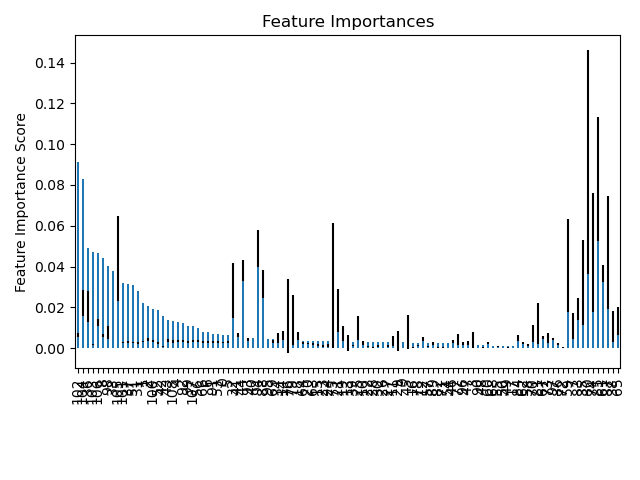

array([6.49530894e-03, 2.21082524e-02, 2.04254080e-02, 1.70776838e-03,
       1.25846767e-02, 6.33617100e-03, 7.66229255e-03, 1.29425214e-04,
       4.39491344e-02, 2.75844543e-03, 3.02546295e-03, 2.79961101e-03,
       2.48187873e-03, 3.20889288e-03, 4.19454536e-03, 3.32267665e-03,
       2.50429050e-03, 9.79559643e-04, 3.67454928e-03, 3.22997783e-03,
       3.36408444e-03, 3.24979503e-03, 3.02443716e-03, 3.30116145e-03,
       3.30052084e-03, 3.02652945e-03, 2.86985007e-03, 2.85539383e-03,
       3.01937165e-03, 2.78127339e-03, 2.97714233e-03, 2.82399077e-02,
       6.30751839e-03, 3.80298834e-02, 4.19974121e-03, 1.22884766e-04,
       4.88593890e-02, 3.13735407e-02, 4.82426294e-06, 3.14258741e-03,
       5.05788534e-03, 6.06460443e-03, 1.56857751e-02, 1.37993644e-02,
       5.93286376e-03, 2.72050839e-03, 2.24353425e-03, 1.77595173e-03,
       1.37440679e-03, 9.99256336e-04, 1.09611130e-03, 3.09005890e-02,
       1.86486658e-02, 7.05224065e-03, 2.30916795e-03, 1.10697693e-03,
      

In [17]:
# importancia de variables por impureza 

# extraer numero de variables de la base
nombre_variables = [f"variable{i} " for i in range(x_train.shape[1])]

# crear RandomForestClassifier virgen 
rfc = RandomForestClassifier(random_state=0)

# ajustar RandomForest a la base
rfc.fit(x_train, y_train)

# calcular la importancia de las variables la impureza acumulada (media y std) 
vars_importancia = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

forest_improtances = pd.Series(vars_importancia , index=nombre_variables)

fig, ax=plt.subplots()
forest_improtances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances ")
ax.set_ylabel("Mean decrease in impurity (Gini)")
fig.tight_layout()


forest_improtances_df = pd.DataFrame(data=forest_improtances)
forest_improtances_df.columns = ['variables']
forest_improtances_df.sort_values(by= ['variables'], ascending = False)


vars_importancia


#forest_improtances_df.sort_values(by=[], inplace=True, ascending=False)



In [47]:
feat_imp = pd.Series(rfc.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

feat_imp.head(15)


102    0.091265
104    0.082782
36     0.048859
103    0.046902
106    0.046797
8      0.043949
98     0.040340
33     0.038030
105    0.036759
101    0.032018
37     0.031374
51     0.030901
31     0.028240
1      0.022108
2      0.020425
dtype: float64

In [31]:
# ["prop_cotiza","Valor_Arriendo", " Horas_Hogar", "ppc", "años_educ_promedio"
# "Npersug", "prop_ocupados_pet", " P6040", "age2", "recibe_arriendos1"]


x_train.iloc[:,101]

0        1
1        0
2        0
3        0
4        0
        ..
63797    0
63798    0
63799    0
63800    0
63801    0
Name: recibe_arriendos1, Length: 63802, dtype: int64

<IPython.core.display.Javascript object>


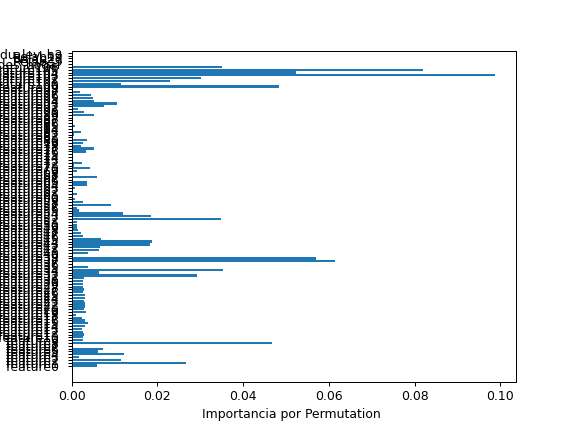

<BarContainer object of 107 artists>

In [29]:
plt.barh(nombre_variables, vars_importancia)

In [ ]:
# Importancia de variables por Permutation        

perm_importance = permutation_importance(rfc, x_test, y_test) 


sorted_vars = perm_importance.importances_mean.argsort()
plt.barh(x_train.columns.values[sorted_vars], perm_importance.importances_mean[sorted_vars] )
plt.xlabel("Importancia por Permutation ")

In [101]:
# Decision Tree Classifier:

# crear arbol DecisionTreeClassifier 
dtc1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,  max_features=15, min_samples_split=100 , random_state=0) 

# ajustar arbol con train-set 
dtc1.fit(x_train,y_train)

# crear vectores de prediccion y_hat  en trian-set y test-set
y_hat_train =dtc1.predict(x_train)
y_hat_test = dtc1.predict(x_test)

# matriz de confusion
confusion_train = confusion_matrix(y_train, y_hat_train)
confusion_test = confusion_matrix(y_test, y_hat_test)

# metricas de evaluacion

train_acc = accuracy_score(y_train, y_hat_train )
test_acc = accuracy_score(y_test, y_hat_test )

train_prec =precision_score(y_train, y_hat_train)
test_prec =precision_score(y_test, y_hat_test )

train_recall = recall_score(y_train, y_hat_train )
test_recall = recall_score(y_test, y_hat_test )

train_f1 = f1_score(y_train, y_hat_train )
test_f1 = f1_score(y_test, y_hat_test )



#print(classification_report)
print(train_acc, test_acc, train_prec, test_prec, train_recall, test_recall, train_f1, test_f1)


ValueError: Unknown label type: 'continuous'

In [93]:
# curvas ROC y precision-recall

# calcular función de probabilidad MLE para base x
y_prob_fn_train = dtc1.predict_proba(x_train)
y_prob_fn_test = dtc1.predict_proba(x_test)


y_prob_fn_score
x_train.shape

(66087, 107)

In [51]:
# crear Gradient Boosting Classifier RF
#gbc =  GradientBoostingClassifier( learning_rate=[0.1,0.01,0.001], max_depth=9, min_samples_split=2000, n_estimators=100,  max_features=15,  , random_state=0)

# GradientBoostingClassifier Tunning
# crear GradientBoostingClassifier para sintonizar hiper parametros
gbc_tunn_hyper =  GradientBoostingClassifier(min_samples_split= 660, max_features=8 , random_state=10)
#ajustar
gbc_tunn_hyper.fit(x_train,y_train)
# grid de hiper parámetros para optimizar
grid_values_tunn = {'learning_rate':[0.1,0.05,0.01], 'n_estimators':[50,100,300,500]}

# crear GridSearchCV 
grid_gbc_recall = GridSearchCV(gbc_tunn_hyper, param_grid= grid_values_tunn, scoring='recall', cv=5)
grid_gbc_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_gbc_recall.best_params_)
print('Grid best score (recall): ' , grid_gbc_recall.best_score_)



Grid best parameter(max. recall):  {'learning_rate': 0.1, 'n_estimators': 500}
Grid best score (recall):  0.8128207025505144


In [59]:
# crear Gradient Boosting Classifier RF
#gbc =  GradientBoostingClassifier( learning_rate=[0.1,0.01,0.001], max_depth=9, min_samples_split=2000, n_estimators=100,  max_features=15,  , random_state=0)

# GradientBoostingClassifier Tunning
# crear GradientBoostingClassifier para sintonizar parametros de Arbol
gbc_tunn =  GradientBoostingClassifier( max_features=8 , random_state=0)

# grid de hiper parámetros para optimizar
grid_values_tunn = {'learning_rate': [0.1,0.05,0.01] , 'n_estimators' : [200,500,600], 'max_depth':[8,10,12] ,'min_samples_split':[500,600,650] }

# crear GridSearchCV 
grid_rfc_recall = GridSearchCV(gbc_tunn, param_grid= grid_values_tunn, scoring='recall', cv=10)
grid_rfc_recall.fit(x_train,y_train)


print('Grid best parameter(max. recall): ', grid_rfc_recall.best_params_)
print('Grid best score (recall): ' , grid_rfc_recall.best_score_)



KeyboardInterrupt: 

In [54]:
gbc =  GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 500, min_samples_split= 650, max_features=8 , random_state=0)
gbc.fit(x_train,y_train)

# crear vectores de prediccion y_hat  en train-set y test-set
y_hat_train =gbc.predict(x_train)
y_hat_test = gbc.predict(x_test)


# matriz de confusion
confusion_train = confusion_matrix(y_train, y_hat_train)
confusion_test = confusion_matrix(y_test, y_hat_test)

# metricas de evaluacion

train_acc = accuracy_score(y_train, y_hat_train )
test_acc = accuracy_score(y_test, y_hat_test )

train_prec =precision_score(y_train, y_hat_train)
test_prec =precision_score(y_test, y_hat_test )

train_recall = recall_score(y_train, y_hat_train )
test_recall = recall_score(y_test, y_hat_test )

train_f1 = f1_score(y_train, y_hat_train )
test_f1 = f1_score(y_test, y_hat_test )



tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train ).ravel()
spec_train = tn / (tn+fp)

tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test ).ravel()
spec_test = tn / (tn+fp)


avg_train = 0.75*train_recall+0.25*spec_train
avg_test = 0.75*test_recall+0.25*spec_test


#print(classification_report)
print(avg, train_acc, test_acc, train_prec, test_prec, train_recall, test_recall, train_f1, test_f1)


# Resultados

data = [{'avg':avg_train, 'accuracy':train_acc, 'precision':train_prec, 'recall':train_recall, 'specificity':spec_train , 'F1':train_f1},
       {'avg':avg_test, 'accuracy':test_acc, 'precision':test_prec, 'recall':test_recall, 'specificity':spec_test, 'F1':test_f1}]

res = pd.DataFrame(data, index=['train-set', 'test-set'])


res

0.7005018506192796 0.8381085232437855 0.8216263480034975 0.7861016949152543 0.5666851134477033 0.8177971082637827 0.6328800988875154 0.8016362274586621 0.597956204379562


,avg,accuracy,precision,recall,specificity,F1
train-set,0.826260,0.838109,0.786102,0.817797,0.851650,0.801636
test-set,0.692579,0.821626,0.566685,0.632880,0.871676,0.597956


In [104]:
# GradientBoostingRegressor

# crear GradientBoostingRegressor
reg_gbr = GradientBoostingRegressor(min_samples_split= 450, max_features=8 , random_state=0)
# ajustar modelo a train-set
reg_gbr.fit(x_train, y_train)

# crear grid de valores para hacer GridSerachCV de parametros de Boosting

grid_values_tunn = { 'learning_rate':[0.1,0.05,0.01],'n_estimators': [100,300,500]}   

# crear GridSearchCV 
grid_gbr_recall = GridSearchCV(reg_gbr, param_grid= grid_values_tunn)
grid_gbr_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_gbr_recall.best_params_)
print('Grid best score (recall): ' , grid_gbr_recall.best_score_)


grid_gbr_recall



Grid best parameter(max. recall):  {'learning_rate': 0.01, 'n_estimators': 500}
Grid best score (recall):  0.1575770415840757


GridSearchCV(estimator=GradientBoostingRegressor(max_features=8,
                                                 min_samples_split=450,
                                                 random_state=0),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [100, 300, 500]})

In [105]:
##### GradientBoostingRegressor

# crear GradientBoostingRegressor
reg_gbr = GradientBoostingRegressor(learning_rate= 0.01,n_estimators = 500, max_features=8 , criterion= 'mse', random_state=0)
# ajustar modelo a train-set
reg_gbr.fit(x_train, y_train)
# crear grid de valores pa vc  ra hacer GridSerachCV de parametros de arbol

grid_values_tunn = { 'min_samples_split':[300,400,600], 'max_depth':[6,8,10],'ccp_alpha': [0.1,0.05,0.01]}   

# crear GridSearchCV 
grid_gbr_recall = GridSearchCV(reg_gbr, param_grid= grid_values_tunn)
grid_gbr_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_gbr_recall.best_params_)
print('Grid best score (recall): ' , grid_gbr_recall.best_score_)


grid_gbr_recall


Grid best parameter(max. recall):  {'ccp_alpha': 0.01, 'max_depth': 8, 'min_samples_split': 400}
Grid best score (recall):  0.11272326484350008


GridSearchCV(estimator=GradientBoostingRegressor(criterion='mse',
                                                 learning_rate=0.01,
                                                 max_features=8,
                                                 n_estimators=500,
                                                 random_state=0),
             param_grid={'ccp_alpha': [0.1, 0.05, 0.01],
                         'max_depth': [6, 8, 10],
                         'min_samples_split': [300, 400, 600]})

In [91]:
# crear vectores de prediccion y_hat  en trian-set y test-set
y_hat_train =grid_gbr_recall.predict(x_train)
y_hat_test = grid_gbr_recall.predict(x_test)

# convertir prediccion en discreto
y_hat_train = np.exp(y_hat_train)
y_hat_train = (y_hat_train/x_train['Npersug'])
y_hat_train = y_hat_train <= x_train_lp
y_hat_train = y_hat_train.astype(int)

# convertir prediccion en discreto
y_hat_test = np.exp(y_hat_test)
y_hat_test = (y_hat_test/x_test['Npersug'])
y_hat_test = y_hat_test <= x_test_lp
y_hat_test = y_hat_test.astype(int)


confusion_train = confusion_matrix(y_train_p, y_hat_train)
#y_hat_test = np.exp(y_hat_test)
#y_hat_test = (y_hat_train/x_test['Npersug'])<=x_test_lp


# matriz de confusion
confusion_train = confusion_matrix(y_train_p, y_hat_train)
confusion_test = confusion_matrix(y_test_p, y_hat_test)

# metricas de evaluacion

train_acc = accuracy_score(y_train_p, y_hat_train )
test_acc = accuracy_score(y_test_p, y_hat_test )

train_prec =precision_score(y_train_p, y_hat_train)
test_prec =precision_score(y_test_p, y_hat_test)

train_recall = recall_score(y_train_p, y_hat_train )
test_recall = recall_score(y_test_p, y_hat_test)

train_f1 = f1_score(y_train_p, y_hat_train )
test_f1 = f1_score(y_test_p, y_hat_test)



tn, fp, fn, tp = confusion_matrix(y_train_p, y_hat_train ).ravel()
spec_train = tn / (tn+fp)

tn, fp, fn, tp = confusion_matrix(y_test_p, y_hat_test ).ravel()
spec_test = tn / (tn+fp)


avg_train = 0.75*train_recall+0.25*spec_train
avg_test = 0.75*test_recall+0.25*spec_test


#print(classification_report)
print(avg, train_acc, test_acc, train_prec, test_prec, train_recall, test_recall, train_f1, test_f1)


# Resultados

data = [{'avg':avg_train, 'accuracy':train_acc, 'precision':train_prec, 'recall':train_recall, 'F1':train_f1},
       {'avg':avg_test, 'accuracy':test_acc, 'precision':test_prec, 'recall':test_recall, 'F1':test_f1}]

res = pd.DataFrame(data, index=['train-set', 'test-set'])
res






0.7005018506192796 0.7696467195385724 0.8006412124744973 0.7376185458377239 0.5198992443324937 0.6582814153050429 0.6378244746600742 0.6956953848065097 0.5728559533721898


,avg,accuracy,precision,recall,F1
train-set,0.704684,0.769647,0.737619,0.658281,0.695695
test-set,0.689322,0.800641,0.519899,0.637824,0.572856


In [85]:
# Decision Tree Regressor:

# crear arbol DecisionTreeRegressor

# crear arbol DecisionTreeClassifier 
dtr1 = DecisionTreeRegressor(criterion='squared_error', splitter = 'best' , max_depth=None,   max_features=7, min_samples_split=1000 , random_state=0) 

# ajustar arbol con train-set 
dtr1.fit(x_train,y_train)

# crear vectores de prediccion y_hat  en trian-set y test-set
y_hat_train =dtr1.predict(x_train)
y_hat_test = dtr1.predict(x_test)

# convertir y_hat en continuo

y_hat_train_disc = np.exp(y_hat_train)
y_hat_train_disc = (y_hat_train_disc/x_train['Npersug'])
y_hat_train_resu = y_hat_train_disc <= x_train_lp
y_hat_train_resu.astype(int)


y_hat_test_disc = np.exp(y_hat_test)
y_hat_test_disc = (y_hat_test_disc/x_test['Npersug'])
y_hat_test_resu = y_hat_test_disc <= x_test_lp
y_hat_test_resu.astype(int)



# matriz de confusion
confusion_train = confusion_matrix(y_train_p, y_hat_train_resu)
confusion_test = confusion_matrix(y_test_p, y_hat_test_resu)

# metricas de evaluacion

train_acc = accuracy_score(y_train_p, y_hat_train_resu)
test_acc = accuracy_score(y_test_p, y_hat_test_resu)

train_prec =precision_score(y_train_p, y_hat_train_resu)
test_prec =precision_score(y_test_p, y_hat_test_resu )

train_recall = recall_score(y_train_p, y_hat_train_resu)
test_recall = recall_score(y_test_p, y_hat_test_resu)

train_f1 = f1_score(y_train_p, y_hat_train_resu )
test_f1 = f1_score(y_test_p, y_hat_test_resu)

print(train_acc, test_acc, train_prec, test_prec, train_recall, test_recall)





0.7926067153903188 0.8181453079534433 0.755428021029819 0.5367687013222242 0.7120484206544354 0.6726309816531114
